In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Notch Digital Filter (6 marks, 3/2/1)

### Collaborator = none

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

_Hint_: For question 2, $W(f)$ is obtained by $W(z = e^{-i \omega \Delta}$). For question 3, you don't have to
compute the FWHM value analytically (although it can be done); an inspection of the discrete array of $|W(f)|^2$
vector is sufficient. Note here $f_\text{fwhm}$ is in terms of frequency (1/year), not angular frequency.

1. 

Looking at the definition of the filter, we can see that W(z) = 0 if z = q or z = q*, and the pole of W(z) is located at when z = p or z = p*.

Then based on the definition of z and q, z = q if omega = f0, which f0 = 1, and z = q* if omega = -f0 = -1. Then the zero of W(z) is right on the unit circle.

On the other hand, z = p if $\frac{\omega}{1+\epsilon}$ = f0, which means omega > 1. Similarly with z = p*, this only occurs if $\frac{\omega}{1+\epsilon}$ = -f0. Then the pole of W(z) lies just slightly outside of the unit circle, since epsilon is very small.

Because the poles and zeroes of W(z) is located on or outside of the unit circle, the system is stable. 

To check if the filter is real or not, we need to see if the filter is real-even and odd-imaginary. We can see that it indeed is, since q, q*, p, p* are all just defined constant, whether or not the function is even or add is dependent on z alone. And we know that z is real-even, and imaginary odd, so W(z) is as well. Then, the filter is real.

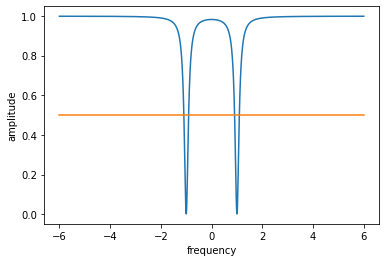

In [172]:
#2

#parameter
m=1.05
epi=0.05
f=1
fs=12
dt=1/(fs)
omega = np.fft.fftshift(np.fft.fftfreq(1001,1/(1001*12/1000)))

#z and q, p
z = np.exp(-1j*2*np.pi*omega*dt)
q = np.exp(-1j*2*np.pi*(f/fs))
p = (1+epi)*q

#define F and F* (using B instead of F)
B = (z-q)/(z-p)
B_conj = (z-np.conj(q))/(z-np.conj(p))
w=m*B*B_conj

#getting the amplitude
w_amp = np.abs(w*np.conj(w))

fwhm = [(np.amax(w_amp)+np.amin(w_amp))/2]*len(omega)

plt.plot(omega,w_amp,omega,fwhm)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()


3. 

By checking the discrete data points, the fwhm is about 15 data points away, which is 15*dt = 15/fs = 15/12 cycles per year.
By changing the parameters, I found out that in order to reduce the fwhm value, we need to make fs value smaller.

# Implementing the Notch Filter (6 marks, 2/2/1/1)

### Collaborator = none

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in question 1.2?
 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 
 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.
 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

1.

By multiplying $\frac{z-q}{z-p}$ with $\frac{z-q*}{z-p*}$, we got $\frac{q^2-z(q*+q)+z^2}{p^2-z(p*+p)+z^2}$.

Sub in p = $(1+\epsilon)q$, we have $\frac{q^2-z(q*+q)+z^2}{(1+\epsilon)^2q^2-z(1+\epsilon)(q*+q)+z^2}$

To make the constant term in the denominator = 1, we multiply the whole thing by $(1+\epsilon)^2q^2$, 

$\frac{q^2-z(q*+q)+z^2}{(1+\epsilon)^2q^2-z(1+\epsilon)(q*+q)+z^2} * (1+\epsilon)^2q^2$ = $\frac{(1+\epsilon)^2q^4-z(1+\epsilon)^2q^2(q*+q)+z^2(1+\epsilon)^2q^2}{1-z\frac{(q*+q)}{(1+\epsilon)q^2}+z^2\frac{1}{(1+\epsilon)^2q^2}}$

so a = $(1+\epsilon)^2q^4$, b = $-(1+\epsilon)^2q^2(q*+q)$, c = $(1+\epsilon)^2q^2$

B = $-\frac{(q*+q)}{(1+\epsilon)q^2}$, C = $\frac{1}{(1+\epsilon)^2q^2}$

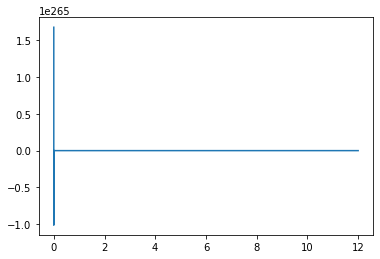

In [230]:
#2.
a = ((1+epi)**2)*(q**4)
b = -((1+epi)**2)*(q**2)*(q+np.conj(q))
c = ((1+epi)**2)*(q**2)

B = -(q+np.conj(q))/((1+epi)*(q)**2)
C = 1/(((1+epi)**2)*(q**2))

N = [np.real(a),np.real(b),np.real(c)]
D = [1, np.real(B),np.real(C)]

# N = [0.95,-1.65,0.95]
# D = [1,-1.65,0.90]

def ratFilter(N,D,x):
    
    #convolve the numerator
    N1 = np.convolve(N,x,mode='same')
    # print(N1)
    
    #initiate the first y value
    a0 = D[0]
    y = [0]*len(N1)
    y[0] = N1[0]/a0
    
    #for loop to get y based on deconvolving N*X with D
    for n in range(len(x)):
        
        #placeholder for the sum of a_k and x_(n-k)
        y_total = 0
        # print(y_total)
        
        #skips over the first y since we already initiated it
        if n >= 1:
            
            #get the sum of a_k and x_(n-k)
            for k in range(len(D)):
                
                #index with n-k, and index cannot go below zero
                if n - k - 1 >= 0:
                    y_total += (D[k]*y[n-k-1]) #each sigma sum is produced by the last 3 y-terms
                    # print(n,k,n-k-1,D[k]*y[n-k-1],y_total)
            
            #get each term of y     
            y[n] = 1/a0 * (N1[n]-y_total)
            
            
    return y

#parameters and define y
dt = 1/fs
x = [0]*1200
x[0]=1/dt

y = ratFilter(N,D,x)
plt.plot(x,y)


3.

I was not able to replicate the correct shape of the notch filter.

# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)

### Collaborator = Ibrahim Pervez, Orion Charron

The provided file `co2data.py` contains carbon dioxide values (in parts per million) measured
every month at the Mauna Loa Observatory in Hawaii, from January 1965 to December 2021.
They show clearly a rising trend in atmospheric $CO_2$. The trend is overlaid with a strong annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.
 2. Apply your notch filter to the detrended data and add back the trend.
 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 3.5]$ cycles per year. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9$ cycles per year to zero (keeping in mind symmetry requirements), which
    effectively removes the annual oscillation. Transform the spectrum back to time domain and
    add back the trend.
 4. Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? But can you think of any advantages/disadvantages in using either method?
 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

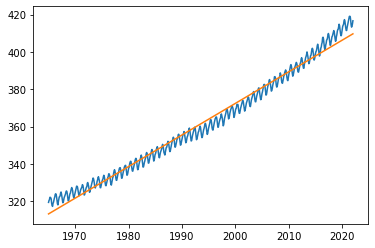

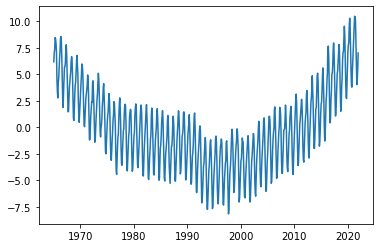

In [3]:
#1.
import sys

sys.path.append(r"C:\Users\bruce\OneDrive\Desktop\Year 4\PHY408\lab3")

from co2data import*

#parameters
co2data = co2Values.flatten()
data = co2data

co2TimeRange = [1965.0411, 2021.9583]
t=np.linspace(co2TimeRange[0],co2TimeRange[1],len(data))

#deleting trend
coef = np.polyfit(t,data,deg=1)
trend = np.poly1d(coef)
trend = trend(t)

detrend = data-trend

#plot detrended data
plt.plot(t,data,t,trend)
plt.show()
plt.plot(t,detrend)
plt.show()

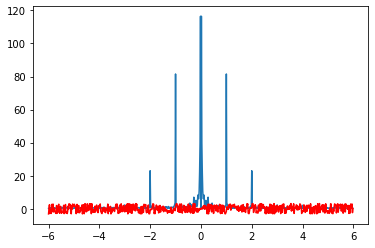

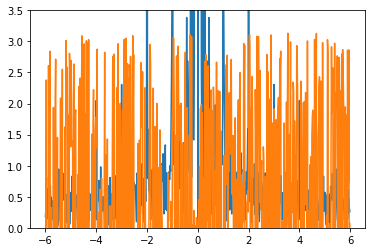

In [9]:
#3

#fft detrended data
ft = np.fft.fftshift(np.fft.fft(detrend))*(t[1]-t[0])
freq = np.fft.fftshift(np.fft.fftfreq(len(data),t[1]-t[0]))

#plot the data
plt.plot(freq,np.abs(ft),freq,np.angle(ft),"r")
plt.show()

#zoom in on the y-values
plt.plot(freq,np.abs(ft),freq,np.angle(ft))
plt.ylim([0,3.5])
plt.show()

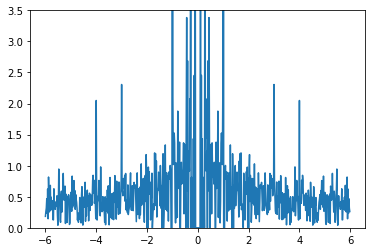

In [10]:
#remove all frequency beyond 0.9
for n in range(len(ft)):
    if ft[n]>0.9:
        ft[n]=0

#plot the data with zoom in on y-values
plt.plot(freq,np.abs(ft))
plt.ylim([0,3.5])
plt.show()


D:\ar\Anaconda2022\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


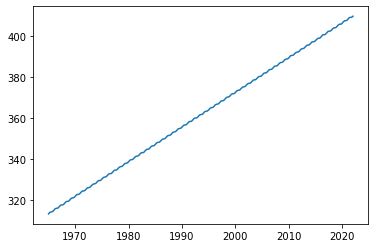

In [6]:
#fft back the filtered data
detrend2 = np.fft.ifft(ft)
filtered = detrend2 + trend

#plot the filtered data
plt.plot(t,filtered)

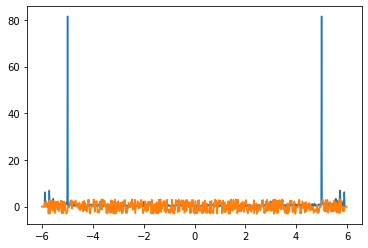

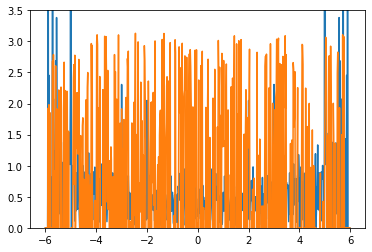

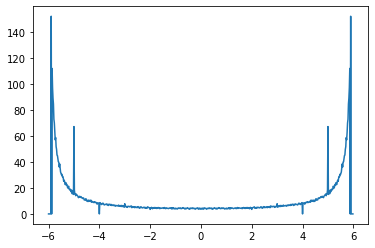

D:\ar\Anaconda2022\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


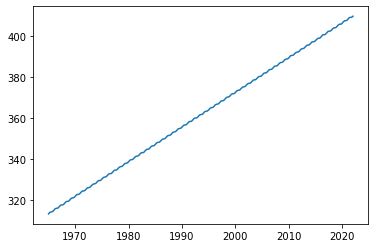

In [12]:
#5
#fft the undetrended data
ft2 = np.fft.fft(data)*(t[1]-t[0])
freq2 = np.fft.fftshift(np.fft.fftfreq(len(data),t[1]-t[0]))

#plot the fft
plt.plot(freq,np.abs(ft),freq,np.angle(ft))
plt.show()

#plot the fft with zoom in on the y-values
plt.plot(freq,np.abs(ft),freq,np.angle(ft))
plt.ylim([0,3.5])
plt.show()

#filted the fft
for n in range(len(ft2)):
    if ft2[n]>0.9:
        ft2[n]=0
        
#plot the filtered fft        
plt.plot(freq2,np.abs(ft2))
plt.show()

#plot the filteded data
filtered2 = np.fft.ifft(ft2)
plt.plot(t,filtered)

5.

I was not able to construct a successful notch filter in part two, so I cannot compare the notch filter with the fourier transform.

By just looking at the difference between detrended and original data using the fourier transform method, I find that the final filtered data is quite similar between the two. However, I notice in the detrended method, we are able to detrended the data with polynomial of higher degrees, instead of just a straight line. This give us a more accurate trending data in the final filtered data. From this I deduce that when taking the original data and try to filter it directly without detrending, we will remove some of the trending data lines, casting the end result to a straight line. Whereas in the detrended method, we are able to preserve all of the trends, so when the trend is a slight curve, we will not just cast it to a straight line but instead preserve the slight curvy line.
